In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("survival_by_class:",survival_by_class)

survival_by_class: Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("survival_by_gender",survival_by_gender)

survival_by_gender Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
survival_by_class_gender = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("survival_by_class_gender",survival_by_class_gender)

survival_by_class_gender Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


# **Survival Rate by Passenger Class**

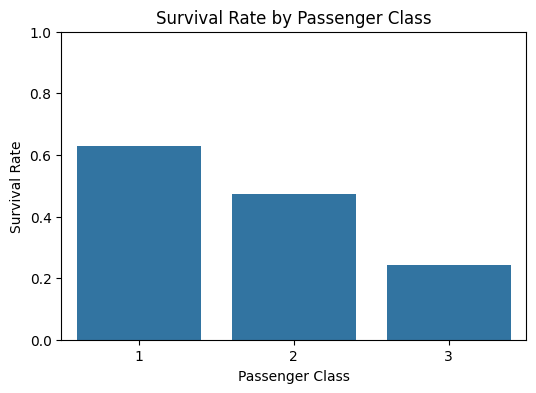

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


# **Survival Rate by Gender**

/tmp/ipython-input-15-2093629579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='pastel')


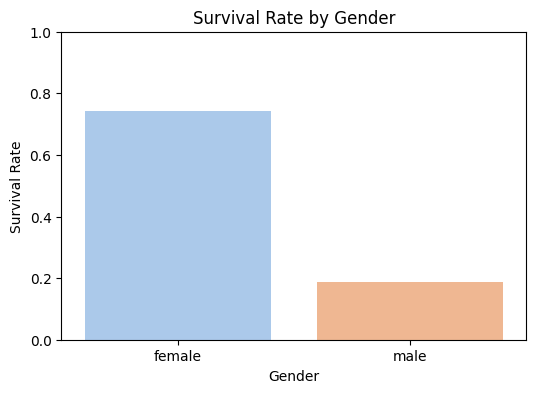

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


# **Survival Rate by Class and Gender**

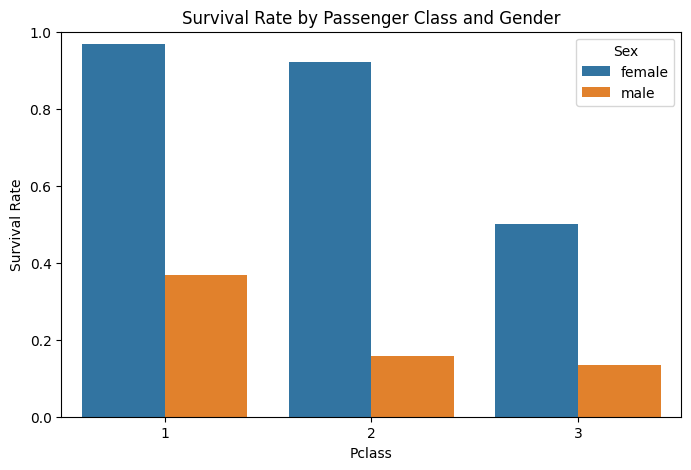

In [ ]:
plt.figure(figsize=(8, 5))
survival_df = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
sns.barplot(data=survival_df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()
